<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
df = pd.DataFrame(pd.read_csv("wine-missing.csv"))
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_type = df['type']
df_rest = df.drop(['type'], axis=1)
df_rest.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


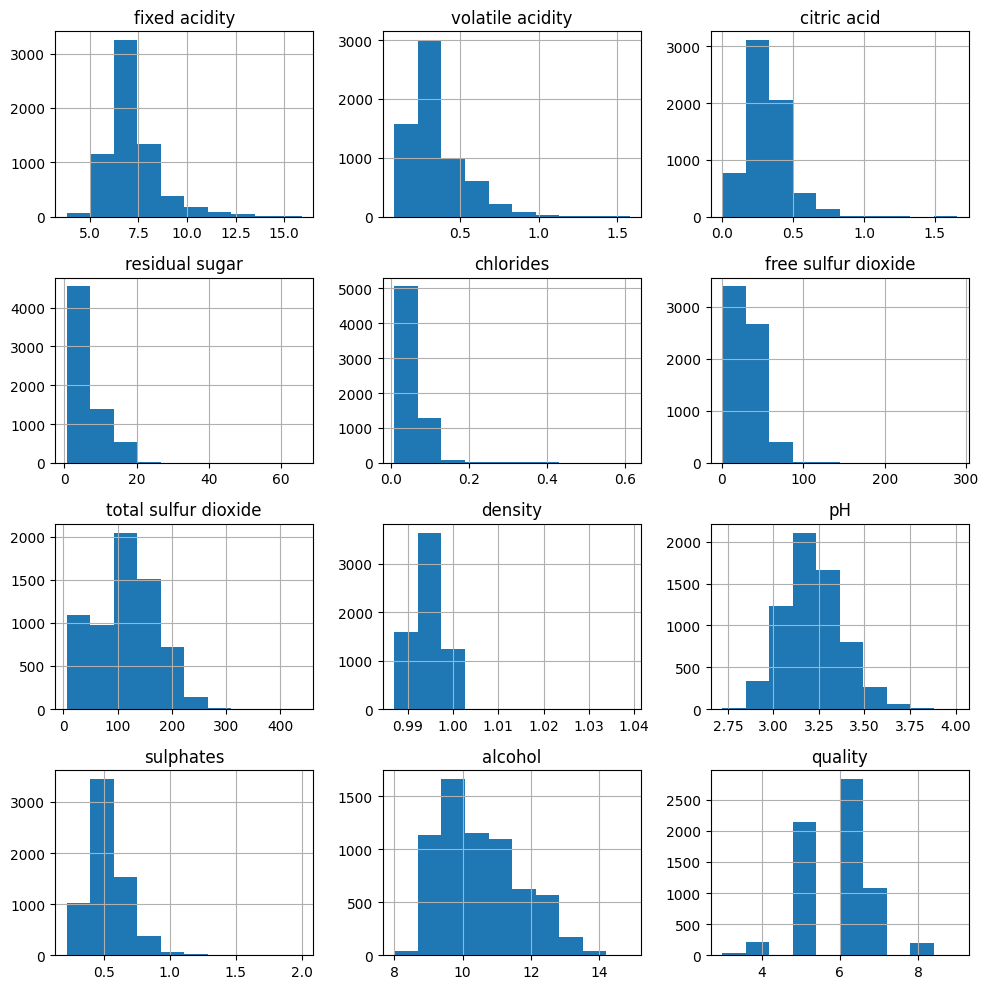

In [ ]:
df_rest.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

From the above statistical measurements and histograms of each feature, we can conclude that many features are significantly right-skewed (e.g. residual sugar, chlorides, volatile acidity etc).

Generally, the feature scale differs from feature to feature, which may be a sign for scaling necessity. For example, citric acid, volatile acidity, chlorides, density and sulphates seem to have a small scale (between 0 and 1) compared to other features like free and total sulfur dioxide.

Density has a really low standard deviation (std=0.003) compared to its mean value (mu=0.99), which means it may not affect our model predictions. On the contrary, features like residual sugar, sulfur dioxide and volatile acidity appear to have large variances with respect to their mean values.

PH seems to be normally distributed and it is found between 2.7 and 4, which implies that wines are acids.

Some outliers appear in some features, such as in residual sugar (65.8), total sulfur dioxide (440) etc.

Finally, the quality is a metric with integer values inside the 0-10 scale, but has 3 and 9 as min and max values respectively.

/tmp/ipython-input-1815076276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=custom_colors)


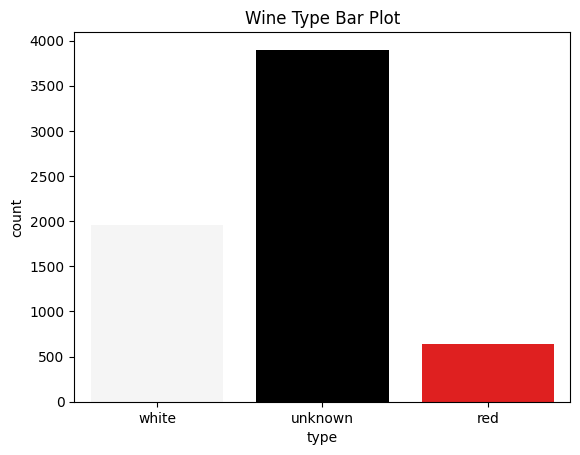

In [ ]:
custom_colors = ['#F5F5F5', 'black', 'red']   # example

sns.countplot(x='type', data=df, palette=custom_colors)
plt.title("Wine Type Bar Plot")
plt.show()


From the wine type bar plot, we can observe that the majority of recorded wine samples is of unknown type. Also, the white wine samples are significantly more than the red ones.

In [ ]:
df['type'] = df['type'].replace({'white':0, 'red':1, 'unknown':2})
df_type = df_type.replace({'white':0, 'red':1, 'unknown':2})
x = df_rest.to_numpy()
y = df_type.to_numpy()


/tmp/ipython-input-2331236015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({'white':0, 'red':1, 'unknown':2})
/tmp/ipython-input-2331236015.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_type = df_type.replace({'white':0, 'red':1, 'unknown':2})


In [ ]:
idx_known = (y == 0) | (y == 1)
x_known = x[idx_known]
y_known = y[idx_known]

idx_unknown = (y == 2)
x_unknown = x[idx_unknown]


In [ ]:
X_known_train, X_known_test, y_known_train, y_known_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42,
                                                                            stratify=y_known)



## Random Forest

It is noted that the random forest can deal with the small number of features' missing values.

In [ ]:
def get_evaluation_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)

  return acc, f1, prec, recall

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_known_train, y_known_train)

y_pred_known_train = rf.predict(X_known_train)
y_pred_known_test = rf.predict(X_known_test)

acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_known_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_known_test)

### Print the evaluation metrics

In [ ]:
print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9987179487179487
Testing F1 Score: 0.9974025974025974
Testing Precision: 0.9948186528497409
Testing Recall: 1.0


## Accuracy or F1?

In [ ]:
numof_white = sum(y_known_test == 0)
numof_red = sum(y_known_test == 1)

print(f"Number of white wines in test set: {numof_white}")
print(f"Number of red wines in test set: {numof_red}")

Number of white wines in test set: 588
Number of red wines in test set: 192


The most indicative evaluation metric for the specific dataset is F1, because it leverages both recall and precision. On the contrary, accuracy could be misleading, especially in an imbalanced dataset like the wine dataset we are dealing with (25% red wines - 75% white wines). In other words, a naive model that always predicts that the tested wine is white, will get a 75% accuracy, which is not indicative of the actual model's performance.

## Balanced Weights

According to the scikit-learn documentation, the class_weight = 'balanced' balances the importance of the 2 classes for the model, as it automatically adjust weights inversely proportional to class frequencies ( n_samples / (n_classes * np.bincount(y)) ). This means that the weight for white wine class will be ~ 4/3* 1/2 and for red wine ~ 4 * 1/2. These weights will affect the training procedure and result in different splitting, because more priority/importance will be given to the rare class (red wine).

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_known_train, y_known_train)

y_pred_known_train = rf.predict(X_known_train)
y_pred_known_test = rf.predict(X_known_test)

acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_known_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_known_test)

print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


Now that the balanced weights hyperparameter has been applied, we can see a small drop in test evaluation metrics.

## Predict Probabilities for classes, label the currently unknown samples that pass the probability threshold and create the new dataset

In [ ]:
y_unknown_proba = rf.predict_proba(x_unknown)

proba_red = y_unknown_proba[:, 1]

y_unknown_pred = np.array([2] * len(x_unknown))

y_unknown_pred[(proba_red > 0.65)] = 1

y_unknown_pred[(proba_red < 0.35)] = 0


x_labeled = x_unknown[np.isin(y_unknown_pred, [0, 1])]
y_labeled = y_unknown_pred[np.isin(y_unknown_pred, [0, 1])]


print(f"Labeled {len(y_labeled)} new data samples")
print("New labeled red wines: ", sum(y_labeled == 1))
print("New labeled white wines: ", sum(y_labeled == 0))


x_train_new = np.vstack([X_known_train, x_labeled])
y_train_new = np.concatenate([y_known_train, y_labeled])
# y_train_new = np.array(y_train_new, dtype=int).reshape(-1)

print("Original training size:", len(X_known_train))
print("New training size:", len(x_train_new))





Labeled 3847 new data samples
New labeled red wines:  908
New labeled white wines:  2939
Original training size: 1819
New training size: 5666


## Train the balanced-weighted Random Forest classifier on the updated dataset

In [ ]:
rf3 = RandomForestClassifier(random_state=42, class_weight="balanced")
rf3.fit(x_train_new, y_train_new)

y_pred_new_train = rf3.predict(X_known_train)
y_pred_new_test = rf3.predict(X_known_test)


acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_new_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_new_test)

print("Evaluation metrics on original train/test datasets of actually known labels. The model used is a Random Forest trained on new (augmented) dataset.\n")

print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Evaluation metrics on original train/test datasets of actually known labels. The model used is a Random Forest trained on new (augmented) dataset.

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


## Repeat the procedure until no other unknown samples can be predicted with probability (confidence) that passes the threshold

In [ ]:
iterations = 0

while len(y_labeled) > 0:

  if iterations >= 100:
    break

  print(f"\n\nITERATION: {iterations+1} \n")

  rf3 = RandomForestClassifier(random_state=42, class_weight="balanced")
  rf3.fit(x_train_new, y_train_new)

  x_unknown = x_unknown[np.isin(y_unknown_pred, 2)]
  print("New unknown samples: ", len(x_unknown))

  y_unknown_proba = rf3.predict_proba(x_unknown)

  proba_red = y_unknown_proba[:, 1]

  y_unknown_pred = np.array([2] * len(x_unknown))

  y_unknown_pred[(proba_red > 0.65)] = 1

  y_unknown_pred[(proba_red < 0.35)] = 0


  x_labeled = x_unknown[np.isin(y_unknown_pred, [0, 1])]
  y_labeled = y_unknown_pred[np.isin(y_unknown_pred, [0, 1])]


  print(f"Labeled {len(y_labeled)} new data samples")
  print("New labeled red wines: ", sum(y_labeled == 1))
  print("New labeled white wines: ", sum(y_labeled == 0))

  x_train_previous = x_train_new

  x_train_new = np.vstack([x_train_new, x_labeled])
  y_train_new = np.concatenate([y_train_new, y_labeled])
  # y_train_new = np.array(y_train_new, dtype=int).reshape(-1)


  print("Previous training size:", len(x_train_previous))
  print("New training size:", len(x_train_new))



  y_pred_new_train = rf3.predict(X_known_train)
  y_pred_new_test = rf3.predict(X_known_test)

  acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_new_train)
  acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_new_test)

  print(f"\n\nTraining Accuracy: {acc_train}")
  print(f"Training F1 Score: {f1_train}")
  print(f"Training Precision: {prec_train}")
  print(f"Training Recall: {recall_train}")

  print(f"Testing Accuracy: {acc_test}")
  print(f"Testing F1 Score: {f1_test}")
  print(f"Testing Precision: {prec_test}")
  print(f"Testing Recall: {recall_test}")

  iterations+=1



ITERATION: 1 

New unknown samples:  51
Labeled 23 new data samples
New labeled red wines:  10
New labeled white wines:  13
Previous training size: 5666
New training size: 5689


Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


ITERATION: 2 

New unknown samples:  28
Labeled 2 new data samples
New labeled red wines:  1
New labeled white wines:  1
Previous training size: 5689
New training size: 5691


Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9961538461538462
Testing F1 Score: 0.9921259842519685
Testing Precision: 1.0
Testing Recall: 0.984375


ITERATION: 3 

New unknown samples:  26
Labeled 5 new data samples
New labeled red wines:  3
New labeled white

Generally, it seems that this repetitive procedure enhances the model's performance on test data, as we gradually get slightly better test evaluation metrics. This means that the semi-supervised method of predicting and labeling the unknown classes samples and adding them to the training dataset, eventually improves the model. This is a way to deal with datasets with many unlabeled values.